In [34]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import r2_score
import statsmodels.api as sm
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

## Initial Data Cleaning:

In [ ]:
#Load Dataset
df = pd.read_csv("data.csv")

# Column names pre-processing
org_columns = list(df.columns)
for i in range(len(org_columns)):
    org_columns[i] = org_columns[i].replace(" ","_")
    org_columns[i] = org_columns[i].lower()
df.columns = org_columns

# Removing Special Characters
df[org_columns] = df[org_columns].replace({'\$': '', ',': '','%':''}, regex=True)

# Typecasting All numeric columns to float
df[[ 'hourly_or_event_rate','projected_annual_salary','q1_payments',
    'q2_payments','q3_payments','q4_payments','payments_over_base_pay','%_over_base_pay',
    'total_payments','base_pay','permanent_bonus_pay','longevity_bonus_pay',
    'temporary_bonus_pay','lump_sum_pay','overtime_pay','other_pay_&_adjustments',
    'other_pay_(payroll_explorer)','average_health_cost','average_dental_cost','average_basic_life',
    'average_benefit_cost']] = df[[ 'hourly_or_event_rate','projected_annual_salary','q1_payments',
    'q2_payments','q3_payments','q4_payments','payments_over_base_pay','%_over_base_pay',
    'total_payments','base_pay','permanent_bonus_pay','longevity_bonus_pay',
    'temporary_bonus_pay','lump_sum_pay','overtime_pay','other_pay_&_adjustments',
    'other_pay_(payroll_explorer)','average_health_cost','average_dental_cost','average_basic_life',
    'average_benefit_cost']].astype(float)

# Storing the cleaned dataset in a new csv file "processed_data.csv" to avoid cleaning everytime.
df.to_csv("processed_data.csv",header=True,index=False)

## Analysis

In [2]:
# Load dataset
data = pd.read_csv("processed_data.csv")
data.head()

,row_id,year,department_title,payroll_department,record_number,job_class_title,employment_type,hourly_or_event_rate,projected_annual_salary,q1_payments,...,mou_title,fms_department,job_class,pay_grade,average_health_cost,average_dental_cost,average_basic_life,average_benefit_cost,benefits_plan,job_class_link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,70386.48,16129.89,...,NaN,98,1230,NaN,16842.08,1282.61,0.00,18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,25.12,52450.56,11331.00,...,POLICE OFFICERS UNIT,70,2214,A,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,42.77,89303.76,20036.32,...,POLICE OFFICERS UNIT,70,2214,2,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,28.75,60028.96,15793.88,...,SUPV BLUE COLLAR,42,3184,0,10710.24,405.24,11.40,11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,30.92,64553.13,14700.00,...,CLERICAL UNIT,82,1368,0,11000.40,409.68,11.40,11421.48,City,http://per.lacity.org/perspecs/1368.pdf


In [3]:
# Displaying all Columns
data.columns

Index(['row_id', 'year', 'department_title', 'payroll_department',
       'record_number', 'job_class_title', 'employment_type',
       'hourly_or_event_rate', 'projected_annual_salary', 'q1_payments',
       'q2_payments', 'q3_payments', 'q4_payments', 'payments_over_base_pay',
       '%_over_base_pay', 'total_payments', 'base_pay', 'permanent_bonus_pay',
       'longevity_bonus_pay', 'temporary_bonus_pay', 'lump_sum_pay',
       'overtime_pay', 'other_pay_&_adjustments',
       'other_pay_(payroll_explorer)', 'mou', 'mou_title', 'fms_department',
       'job_class', 'pay_grade', 'average_health_cost', 'average_dental_cost',
       'average_basic_life', 'average_benefit_cost', 'benefits_plan',
       'job_class_link'],
      dtype='object')

## Correlation heat map plot after data cleaning

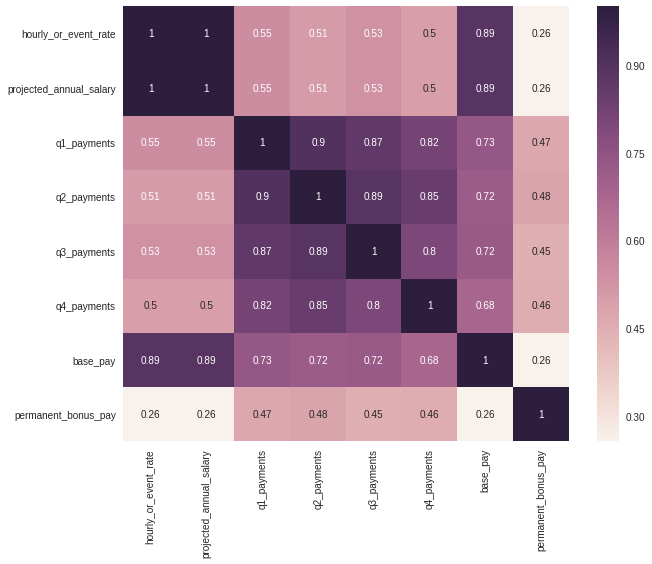

In [9]:
subcorr = sub_data.corr()
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(subcorr,annot=True,ax=ax)

In [30]:
# Function to remove outliers
def outlier_range(x):
    x = np.array(x)
    upper_q = np.percentile(x, 75)
    lower_q = np.percentile(x, 25)
    iqr = (upper_q - lower_q) * 1.5
    acceptable_range = (lower_q - iqr, upper_q + iqr)
    return acceptable_range

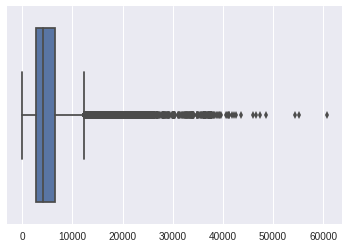

In [11]:
sns.boxplot(list(sub_data.permanent_bonus_pay))

In [16]:
# Creating grouped dataset grouped by "department_title"
grouping = sub_data.groupby("department_title").mean()
grouping.head()

,hourly_or_event_rate,projected_annual_salary,q1_payments,q2_payments,q3_payments,q4_payments,base_pay,permanent_bonus_pay
department_title,,,,,,,,
Aging,39.530000,82538.640000,19491.600000,25373.420000,19154.800000,22586.800000,83693.070000,912.350000
Airports (LAWA),34.215724,71442.344038,19729.799430,22553.469378,20754.839120,22817.354438,63967.975313,3973.935331
Animal Services,30.194765,63047.649262,14727.189128,16959.803423,15521.091208,16126.806309,57939.250268,1661.878255
Building and Safety,44.698193,93324.831074,23016.762902,27122.441094,24774.016456,26237.599659,84982.196215,4650.669016
City Administrative Officer (CAO),66.037500,137889.432500,30427.012500,35613.455000,32568.540000,35704.975000,128822.360000,4418.237500


In [31]:
# Function to calculate SSE
def sse_calc(actual,predicted):
    sse = 0
    for i in range(len(actual)):
        sse = sse + pow((actual[i] - predicted[i]),2)
    return sse

# Function to calculate MAPE
def mape_calc(actual,predicted):
    mape = 0
    for i in range(len(actual)):
        if actual[i]!=0:
            mape += abs(actual[i]-predicted[i])/actual[i]
    mape = (mape*100)/len(actual)
    return mape

# Linear Regression Analysis:

## LR After Outlier Removal:

In [54]:
# Getting training data (before the year 2016)
sub_data = data[data['year']<=2015]

# Get important columns
sub_data = sub_data[['department_title','hourly_or_event_rate','projected_annual_salary',
                 'q1_payments','q2_payments', 'q3_payments', 'q4_payments','base_pay', 'permanent_bonus_pay']]

# Remove negative and Nan values
num = sub_data._get_numeric_data()
num[num < 0] = 0
sub_data = sub_data.replace(0, np.nan)
sub_data = sub_data.dropna()

# Remove outliers
cols = ['hourly_or_event_rate','projected_annual_salary','q1_payments','q2_payments', 'q3_payments', 
        'q4_payments','base_pay', 'permanent_bonus_pay']
for col in cols:
    a = outlier_range(list(sub_data[col]))
    sub_data = sub_data[(sub_data[col]>=a[0]) & (sub_data[col]<=a[1])]

# Fit Linear Regression Models
X_train = sub_data[['hourly_or_event_rate','q1_payments','q2_payments', 'q3_payments', 
        'q4_payments','base_pay', 'permanent_bonus_pay']]
Y_train = sub_data['projected_annual_salary']
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

print("EQUATION:")
print("Y = ("+str(regr.coef_[0])+") X1 \n   +("+str(regr.coef_[1])+") X2 \n   +("
      +str(regr.coef_[2])+") X3 \n   +("+str(regr.coef_[3])+") X4 \n   +("
      +str(regr.coef_[4])+") X5 \n   +("+str(regr.coef_[5])+") X6 \n   +("+str(regr.coef_[6])+") X7 \n   +("
      +str(regr.intercept_)+")")

print("\n")

# Getting Test Data
test_data = data[data['year']>=2016]

# Grouping data
grouping = sub_data.groupby("department_title").mean()
grouping.head()

# Make predictions based on department title
y_pred = []
for index, row in test_data.iterrows():
    hourly_rate = row['hourly_or_event_rate']
    temp = grouping[grouping.index==row['department_title']]
    try:
        q1 = temp['q1_payments'][0]
        q2 = temp['q2_payments'][0]
        q3 = temp['q3_payments'][0]
        q4 = temp['q4_payments'][0]
        base = row['base_pay']
        bonus = row['permanent_bonus_pay']
        y_pred.append(regr.predict([hourly_rate,q1,q2,q3,q4,base,bonus]))
    except:
        y_pred.append(0)
        pass

# Getting actual values for error check
actual = list(test_data['projected_annual_salary'])

# Some processing required
y_pred_new = []
for i in y_pred:
    try:
        y_pred_new.append(i[0])
    except:
        y_pred_new.append(i)


y_pred_final = []
actual_final = []
for i in range(len(actual)):
    if y_pred_new[i]!=0:
        y_pred_final.append(y_pred_new[i])
        actual_final.append(actual[i])
        
# Computing SSE and MAPE values
print("Sample y_pred values: ",y_pred_new[45678:45690],"\n")
print("Actual values: ",actual[45678:45690],"\n")
print("SSE: ",sse_calc(actual_final,y_pred_final),"\n")
print("MAPE: ",mape_calc(actual_final,y_pred_final))

EQUATION:
Y = (2087.9555889) X1 
   +(-2.33032955403e-05) X2 
   +(-0.000110569938274) X3 
   +(2.79917728252e-05) X4 
   +(5.08891902689e-06) X5 
   +(4.95806723477e-05) X6 
   +(0.000131502128451) X7 
   +(-0.277583954288)


Sample y_pred values:  [array([ 101744.64264821]), array([ 109219.74248075]), array([ 112623.13760107]), array([ 101160.00170153]), array([ 105127.30631701]), array([ 106379.99315612]), array([ 94415.74577499]), array([ 106609.84235733]), array([ 109219.701518]), array([ 108697.64775209]), array([ 103957.88944155]), array([ 99635.74050775])] 

Actual values:  [101744.59, 109232.14999999999, 112622.02, 101163.60000000001, 105134.45, 106383.60000000001, 94419.360000000001, 106614.85000000001, 109232.14999999999, 108701.28, 103961.52, 99639.360000000001] 

SSE:  3.34062503927e+14 

MAPE:  0.00594579931611


## LR Without Removing Outliers:

In [55]:
sub_data = data[data['year']<=2015]

sub_data = sub_data[['department_title','hourly_or_event_rate','projected_annual_salary',
                 'q1_payments','q2_payments', 'q3_payments', 'q4_payments','base_pay', 'permanent_bonus_pay']]

num = sub_data._get_numeric_data()
num[num < 0] = 0
sub_data = sub_data.replace(0, np.nan)

sub_data = sub_data.dropna()

X_train = sub_data[['hourly_or_event_rate','q1_payments','q2_payments', 'q3_payments', 
        'q4_payments','base_pay', 'permanent_bonus_pay']]
Y_train = sub_data['projected_annual_salary']
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

print("EQUATION:")
print("Y = ("+str(regr.coef_[0])+") X1 \n   +("+str(regr.coef_[1])+") X2 \n   +("
      +str(regr.coef_[2])+") X3 \n   +("+str(regr.coef_[3])+") X4 \n   +("
      +str(regr.coef_[4])+") X5 \n   +("+str(regr.coef_[5])+") X6 \n   +("+str(regr.coef_[6])+") X7 \n   +("
      +str(regr.intercept_)+")")

print("\n")

test_data = data[data['year']>=2016]

grouping = sub_data.groupby("department_title").mean()
grouping.head()

y_pred = []
for index, row in test_data.iterrows():
    hourly_rate = row['hourly_or_event_rate']
    temp = grouping[grouping.index==row['department_title']]
    try:
        q1 = temp['q1_payments'][0]
        q2 = temp['q2_payments'][0]
        q3 = temp['q3_payments'][0]
        q4 = temp['q4_payments'][0]
        base = row['base_pay']
        bonus = row['permanent_bonus_pay']
        y_pred.append(regr.predict([hourly_rate,q1,q2,q3,q4,base,bonus]))
    except:
        y_pred.append(0)
        pass

actual = list(test_data['projected_annual_salary'])

y_pred_new = []
for i in y_pred:
    try:
        y_pred_new.append(i[0])
    except:
        y_pred_new.append(i)


y_pred_final = []
actual_final = []
for i in range(len(actual)):
    if y_pred_new[i]!=0:
        y_pred_final.append(y_pred_new[i])
        actual_final.append(actual[i])
        
print("Sample y_pred values: ",y_pred_new[45678:45690],"\n")
print("Actual values: ",actual[45678:45690],"\n")
print("SSE: ",sse_calc(actual_final,y_pred_final),"\n")
print("MAPE: ",mape_calc(actual_final,y_pred_final))

EQUATION:
Y = (2087.95843567) X1 
   +(-8.32457489418e-07) X2 
   +(-6.16673171992e-05) X3 
   +(-1.7606948914e-06) X4 
   +(-1.69306018756e-05) X5 
   +(3.87900977875e-05) X6 
   +(7.11038600324e-05) X7 
   +(0.282607471134)


Sample y_pred values:  [array([ 101745.37802558]), array([ 109220.42231126]), array([ 112623.79208949]), array([ 101160.76362904]), array([ 105127.96585061]), array([ 106380.72291417]), array([ 94416.55607372]), array([ 106610.48784421]), array([ 109220.39206726]), array([ 108698.35813183]), array([ 103958.63363821]), array([ 99636.51162823])] 

Actual values:  [101744.59, 109232.14999999999, 112622.02, 101163.60000000001, 105134.45, 106383.60000000001, 94419.360000000001, 106614.85000000001, 109232.14999999999, 108701.28, 103961.52, 99639.360000000001] 

SSE:  3.3406373765e+14 

MAPE:  0.0050039252221


## LR Without Hourly Rate and Without Outlier Removal:

In [56]:
sub_data = data[data['year']<=2015]

sub_data = sub_data[['department_title','hourly_or_event_rate','projected_annual_salary',
                 'q1_payments','q2_payments', 'q3_payments', 'q4_payments','base_pay', 'permanent_bonus_pay']]

num = sub_data._get_numeric_data()
num[num < 0] = 0
sub_data = sub_data.replace(0, np.nan)

sub_data = sub_data.dropna()

X_train = sub_data[['q1_payments','q2_payments', 'q3_payments', 
        'q4_payments','base_pay', 'permanent_bonus_pay']]
Y_train = sub_data['projected_annual_salary']
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

print("EQUATION:")
print("Y = ("+str(regr.coef_[0])+") X1 \n   +("+str(regr.coef_[1])+") X2 \n   +("
      +str(regr.coef_[2])+") X3 \n   +("+str(regr.coef_[3])+") X4 \n   +("
      +str(regr.coef_[4])+") X5 \n   +("+str(regr.coef_[5])+") X6 \n   +("
      +str(regr.intercept_)+")")

print("\n")

test_data = data[data['year']>=2016]

grouping = sub_data.groupby("department_title").mean()
grouping.head()

y_pred = []
for index, row in test_data.iterrows():
    #hourly_rate = row['hourly_or_event_rate']
    temp = grouping[grouping.index==row['department_title']]
    try:
        q1 = temp['q1_payments'][0]
        q2 = temp['q2_payments'][0]
        q3 = temp['q3_payments'][0]
        q4 = temp['q4_payments'][0]
        base = row['base_pay']
        bonus = row['permanent_bonus_pay']
        y_pred.append(regr.predict([q1,q2,q3,q4,base,bonus]))
    except:
        y_pred.append(0)
        pass

actual = list(test_data['projected_annual_salary'])

y_pred_new = []
for i in y_pred:
    try:
        y_pred_new.append(i[0])
    except:
        y_pred_new.append(i)


y_pred_final = []
actual_final = []
for i in range(len(actual)):
    if y_pred_new[i]!=0:
        y_pred_final.append(y_pred_new[i])
        actual_final.append(actual[i])
        
print("Sample y_pred values: ",y_pred_new[45678:45690],"\n")
print("Actual values: ",actual[45678:45690],"\n")
print("SSE: ",sse_calc(actual_final,y_pred_final),"\n")
print("MAPE: ",mape_calc(actual_final,y_pred_final))

EQUATION:
Y = (-0.0646171018905) X1 
   +(-0.57198421168) X2 
   +(-0.131859288872) X3 
   +(-0.119818158993) X4 
   +(1.15839125661) X5 
   +(0.761316040418) X6 
   +(12196.9674162)


Sample y_pred values:  [18259.715853941067, 22054.942767709967, 20952.670809027597, 19724.070914138058, 19291.212420996515, 20883.409166432095, 17664.45445341093, 21554.746705561542, 21229.075000639274, 20180.703957203652, 19225.187512776167, 18442.560309150515] 

Actual values:  [101744.59, 109232.14999999999, 112622.02, 101163.60000000001, 105134.45, 106383.60000000001, 94419.360000000001, 106614.85000000001, 109232.14999999999, 108701.28, 103961.52, 99639.360000000001] 

SSE:  4.43162403004e+14 

MAPE:  75.3577163886


## LR Without Hourly Rate and After Outlier Removal:

In [57]:
sub_data = data[data['year']<=2015]

sub_data = sub_data[['department_title','hourly_or_event_rate','projected_annual_salary',
                 'q1_payments','q2_payments', 'q3_payments', 'q4_payments','base_pay', 'permanent_bonus_pay']]

num = sub_data._get_numeric_data()
num[num < 0] = 0
sub_data = sub_data.replace(0, np.nan)

sub_data = sub_data.dropna()

cols = ['projected_annual_salary','q1_payments','q2_payments', 'q3_payments', 'q4_payments','base_pay', 
        'permanent_bonus_pay']

for col in cols:
    a = outlier_range(list(sub_data[col]))
    sub_data = sub_data[(sub_data[col]>=a[0]) & (sub_data[col]<=a[1])]

X_train = sub_data[['q1_payments','q2_payments', 'q3_payments', 
        'q4_payments','base_pay', 'permanent_bonus_pay']]
Y_train = sub_data['projected_annual_salary']
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

print("EQUATION:")
print("Y = ("+str(regr.coef_[0])+") X1 \n   +("+str(regr.coef_[1])+") X2 \n   +("
      +str(regr.coef_[2])+") X3 \n   +("+str(regr.coef_[3])+") X4 \n   +("
      +str(regr.coef_[4])+") X5 \n   +("+str(regr.coef_[5])+") X6 \n   +("
      +str(regr.intercept_)+")")

print("\n")

test_data = data[data['year']>=2016]

grouping = sub_data.groupby("department_title").mean()
grouping.head()

y_pred = []
for index, row in test_data.iterrows():
    #hourly_rate = row['hourly_or_event_rate']
    temp = grouping[grouping.index==row['department_title']]
    try:
        q1 = temp['q1_payments'][0]
        q2 = temp['q2_payments'][0]
        q3 = temp['q3_payments'][0]
        q4 = temp['q4_payments'][0]
        base = row['base_pay']
        bonus = row['permanent_bonus_pay']
        y_pred.append(regr.predict([q1,q2,q3,q4,base,bonus]))
    except:
        y_pred.append(0)
        pass

actual = list(test_data['projected_annual_salary'])

y_pred_new = []
for i in y_pred:
    try:
        y_pred_new.append(i[0])
    except:
        y_pred_new.append(i)


y_pred_final = []
actual_final = []
for i in range(len(actual)):
    if y_pred_new[i]!=0:
        y_pred_final.append(y_pred_new[i])
        actual_final.append(actual[i])
        
print("Sample y_pred values: ",y_pred_new[45678:45690],"\n")
print("Actual values: ",actual[45678:45690],"\n")
print("SSE: ",sse_calc(actual_final,y_pred_final),"\n")
print("MAPE: ",mape_calc(actual_final,y_pred_final))

EQUATION:
Y = (-0.0491338647445) X1 
   +(-0.610095446354) X2 
   +(-0.141796933542) X3 
   +(-0.123414560125) X4 
   +(1.17521595853) X5 
   +(1.09026747871) X6 
   +(10067.7982651)


Sample y_pred values:  [16802.802117803447, 20834.354373719172, 19956.104974111891, 18043.993932884659, 18271.777277355111, 19390.053160164676, 15725.579565529961, 20538.267400893317, 19978.447881408851, 18850.584653377518, 17694.065014876636, 16747.844090590635] 

Actual values:  [101744.59, 109232.14999999999, 112622.02, 101163.60000000001, 105134.45, 106383.60000000001, 94419.360000000001, 106614.85000000001, 109232.14999999999, 108701.28, 103961.52, 99639.360000000001] 

SSE:  4.4696506761e+14 

MAPE:  77.1702293405


## LR with only hourly rate:

In [58]:
sub_data = data[data['year']<=2015]

sub_data = sub_data[['department_title','hourly_or_event_rate','projected_annual_salary',
                 'q1_payments','q2_payments', 'q3_payments', 'q4_payments','base_pay', 'permanent_bonus_pay']]

num = sub_data._get_numeric_data()
num[num < 0] = 0
sub_data = sub_data.replace(0, np.nan)

sub_data = sub_data.dropna()

cols = ['hourly_or_event_rate']

for col in cols:
    a = outlier_range(list(sub_data[col]))
    sub_data = sub_data[(sub_data[col]>=a[0]) & (sub_data[col]<=a[1])]

X_train = sub_data[['hourly_or_event_rate']]
Y_train = sub_data['projected_annual_salary']
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

print("EQUATION:")
print("Y = ("+str(regr.coef_[0])+") X1 \n   +("
      +str(regr.intercept_)+")")

print("\n")

test_data = data[data['year']>=2016]

grouping = sub_data.groupby("department_title").mean()
grouping.head()

y_pred = []
for index, row in test_data.iterrows():
    hourly_rate = row['hourly_or_event_rate']
    try:
        y_pred.append(regr.predict([hourly_rate]))
    except:
        y_pred.append(0)
        pass

actual = list(test_data['projected_annual_salary'])

y_pred_new = []
for i in y_pred:
    try:
        y_pred_new.append(i[0])
    except:
        y_pred_new.append(i)


y_pred_final = []
actual_final = []
for i in range(len(actual)):
    if y_pred_new[i]!=0:
        y_pred_final.append(y_pred_new[i])
        actual_final.append(actual[i])
        
print("Sample y_pred values: ",y_pred_new[45678:45690],"\n")
print("Actual values: ",actual[45678:45690],"\n")
print("SSE: ",sse_calc(actual_final,y_pred_final),"\n")
print("MAPE: ",mape_calc(actual_final,y_pred_final))

EQUATION:
Y = (2088.00107249) X1 
   +(-0.149279120145)


Sample y_pred values:  [101748.14298310412, 109223.18682260266, 112626.6285707542, 101163.50268280816, 105130.70472053083, 106383.5053640222, 94419.259218679596, 106613.18548199562, 109223.18682260266, 108701.18655448125, 103961.42411993888, 99639.261899893652] 

Actual values:  [101744.59, 109232.14999999999, 112622.02, 101163.60000000001, 105134.45, 106383.60000000001, 94419.360000000001, 106614.85000000001, 109232.14999999999, 108701.28, 103961.52, 99639.360000000001] 

SSE:  3.69391967039e+14 

MAPE:  0.00254609815919


## LR without Hourly and Quarters:

In [59]:
sub_data = data[data['year']<=2015]

sub_data = sub_data[['department_title','hourly_or_event_rate','projected_annual_salary',
                 'q1_payments','q2_payments', 'q3_payments', 'q4_payments','base_pay', 'permanent_bonus_pay']]

num = sub_data._get_numeric_data()
num[num < 0] = 0
sub_data = sub_data.replace(0, np.nan)

sub_data = sub_data.dropna()

cols = ['projected_annual_salary','base_pay', 'permanent_bonus_pay']

for col in cols:
    a = outlier_range(list(sub_data[col]))
    sub_data = sub_data[(sub_data[col]>=a[0]) & (sub_data[col]<=a[1])]

X_train = sub_data[['base_pay', 'permanent_bonus_pay']]
Y_train = sub_data['projected_annual_salary']
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

print("EQUATION:")
print("Y = ("+str(regr.coef_[0])+") X1 \n   +("+str(regr.coef_[1])+") X2 \n   +("
      +str(regr.intercept_)+")")

print("\n")

test_data = data[data['year']>=2016]

grouping = sub_data.groupby("department_title").mean()
grouping.head()

y_pred = []
for index, row in test_data.iterrows():
    temp = grouping[grouping.index==row['department_title']]
    try:
        base = row['base_pay']
        bonus = row['permanent_bonus_pay']
        y_pred.append(regr.predict([base,bonus]))
    except:
        y_pred.append(0)
        pass

actual = list(test_data['projected_annual_salary'])

y_pred_new = []
for i in y_pred:
    try:
        y_pred_new.append(i[0])
    except:
        y_pred_new.append(i)


y_pred_final = []
actual_final = []
for i in range(len(actual)):
    if y_pred_new[i]!=0:
        y_pred_final.append(y_pred_new[i])
        actual_final.append(actual[i])
        
print("Sample y_pred values: ",y_pred_new[45678:45690],"\n")
print("Actual values: ",actual[45678:45690],"\n")
print("SSE: ",sse_calc(actual_final,y_pred_final),"\n")
print("MAPE: ",mape_calc(actual_final,y_pred_final))

EQUATION:
Y = (0.876379765085) X1 
   +(0.372226902725) X2 
   +(13623.7659792)


Sample y_pred values:  [35836.444497365606, 38591.582427140958, 37603.817170692164, 37100.963212515453, 36346.033590843581, 37869.177564730708, 35689.459525070983, 38077.684799395465, 37978.337603660533, 37226.382813597898, 36623.420832470729, 36128.890800612746] 

Actual values:  [101744.59, 109232.14999999999, 112622.02, 101163.60000000001, 105134.45, 106383.60000000001, 94419.360000000001, 106614.85000000001, 109232.14999999999, 108701.28, 103961.52, 99639.360000000001] 

SSE:  2.64883842839e+14 

MAPE:  51.1246410746


## LR withour hourly after outlier, train on 2013, test on 2014

In [60]:
sub_data = data[data['year']<=2013]

sub_data = sub_data[['department_title','hourly_or_event_rate','projected_annual_salary',
                 'q1_payments','q2_payments', 'q3_payments', 'q4_payments','base_pay', 'permanent_bonus_pay']]

num = sub_data._get_numeric_data()
num[num < 0] = 0
sub_data = sub_data.replace(0, np.nan)

sub_data = sub_data.dropna()

cols = ['projected_annual_salary','q1_payments','q2_payments', 'q3_payments', 'q4_payments','base_pay', 
        'permanent_bonus_pay']

for col in cols:
    a = outlier_range(list(sub_data[col]))
    sub_data = sub_data[(sub_data[col]>=a[0]) & (sub_data[col]<=a[1])]

X_train = sub_data[['q1_payments','q2_payments', 'q3_payments', 
        'q4_payments','base_pay', 'permanent_bonus_pay']]
Y_train = sub_data['projected_annual_salary']
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

print("EQUATION:")
print("Y = ("+str(regr.coef_[0])+") X1 \n   +("+str(regr.coef_[1])+") X2 \n   +("
      +str(regr.coef_[2])+") X3 \n   +("+str(regr.coef_[3])+") X4 \n   +("
      +str(regr.coef_[4])+") X5 \n   +("+str(regr.coef_[5])+") X6 \n   +("
      +str(regr.intercept_)+")")

print("\n")

test_data = data[data['year']==2016]

grouping = sub_data.groupby("department_title").mean()
grouping.head()

y_pred = []
for index, row in test_data.iterrows():
    temp = grouping[grouping.index==row['department_title']]
    try:
        q1 = temp['q1_payments'][0]
        q2 = temp['q2_payments'][0]
        q3 = temp['q3_payments'][0]
        q4 = temp['q4_payments'][0]
        base = row['base_pay']
        bonus = row['permanent_bonus_pay']
        y_pred.append(regr.predict([q1,q2,q3,q4,base,bonus]))
    except:
        y_pred.append(0)
        pass

actual = list(test_data['projected_annual_salary'])

y_pred_new = []
for i in y_pred:
    try:
        y_pred_new.append(i[0])
    except:
        y_pred_new.append(i)


y_pred_final = []
actual_final = []
for i in range(len(actual)):
    if y_pred_new[i]!=0:
        y_pred_final.append(y_pred_new[i])
        actual_final.append(actual[i])
        
print("Sample y_pred values: ",y_pred[45678:45690],"\n")
print("Actual values: ",actual[45678:45690],"\n")
print("SSE: ",sse_calc(actual_final,y_pred_final),"\n")
print("MAPE: ",mape_calc(actual_final,y_pred_final))

EQUATION:
Y = (-0.150308391937) X1 
   +(-0.42589371165) X2 
   +(-0.480398962221) X3 
   +(-0.248572396115) X4 
   +(1.28663695382) X5 
   +(1.2011862233) X6 
   +(7945.80402898)


Sample y_pred values:  [array([ 10500.34998873]), array([ 14918.43399766]), array([ 13962.62069754]), array([ 11853.41138044]), array([ 12118.63363428]), array([ 13331.12466338]), array([ 9309.75340233]), array([ 14599.29655577]), array([ 13980.95127614]), array([ 12744.62987898]), array([ 11474.01663473]), array([ 10434.4693232])] 

Actual values:  [101744.59, 109232.14999999999, 112622.02, 101163.60000000001, 105134.45, 106383.60000000001, 94419.360000000001, 106614.85000000001, 109232.14999999999, 108701.28, 103961.52, 99639.360000000001] 

SSE:  3.88723081267e+14 

MAPE:  86.4476597726
